In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [4]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,property_id
3304,house,shivaji nagar residential,sector 11,3.08,11407.0,2700.0,Built Up area: 2700 (250.84 sq.m.),6,4,2,not available,1.0,NaN,undefined,"['Hanuman Mandir', 'Dr. Ajay S. Gupta Clinic', 'Gupta Hospital Gurgaon', 'Rajiv Memorial Eye Infirmary Jacobpura', 'Sharma Hospital Gurgaon', 'Triveni Hospital Gurgaon', 'Verma E.N.T. Hospital', 'Nova Care Clinic', 'My Care Clinic', 'M.S Hospital', 'Bindal Clinic', 'Lall Eye Care Centre', 'Kharbanda Maternity and Nursing Home', 'Om Charitable Dental & Implant Centre', 'Lall Nursing and Maternity Home', 'Dentecare - Multispeciality Dental Clinic', 'Dental Health Centre', 'Lalit Dental Care', 'M Goel Hospital', 'Ahooja Eye and Dental Institute Hospital', 'Kidney Clinic', 'Centre For Sight Gurgaon New Railway Road', 'Dr. Sandeep Chauhan', 'Dr. Sarvejeet Singh', 'Ravi Clinic and Health Care Centre', 'Swastik Maternity and Medical Centre', 'Chiranjiv Hospital', 'Bhatnagar Maternity and Nursing Home', 'Jackson Hospital', 'Geeta Nursing Home Gurgaon', 'Satyam Hospital Gurgaon', 'Sparsh Hospital Gurgaon', 'D.R. Rajnis Gupta Clinic', 'Rama Hospital & Nursing Home', 'Pasricha Hospital and Maternity Home', 'Aarvy Hospital', 'Dev Man Kathuria Clinic', 'Shubham Hospital Gurgaon', 'Tirath Ram Hospitals Pvt Ltd', 'Aryan Hospital', 'Sethi Hospital Gurgaon', 'Nangia Hospital Ent and Maternity', 'Dr. Madan Clinic', 'IBP Petrol Station', 'Punjab national bank', 'State bank of india', 'Rang Parivartan', 'Dronacharya Government College', 'govt sec school', 'District library gurgaon']","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",NaN,M68021744
1441,house,independent,sector 55,7.49,27741.0,2700.0,Plot area 300(250.84 sq.m.),12,12,3+,"study room,pooja room,servant room",4.0,South-East,1 to 5 Year Old,"['Sector metro station', 'Sector metro station', 'Sector 54 chowk metro station', 'Sanatan Dharm Mandir', 'Radhakrishna Shani Mandir', 'Icici bank ATM', 'State bank ATM', 'Icici bank ATM', 'Citi bank ATM', 'Indusind bank ATM', 'Arunodaya Deseret Eye Hospital', 'pracksht hospital', 'Surgicare Hospital Gurgaon', 'Kriti Hospital', 'Anand Hospital Gurgaon', 'HUDA Office Complex', 'Medisca', 'Apollo Pharmacy', 'Intellion Park', 'International Tech Park', 'HCG CNG Station', 'Heera Fuel Station', 'State bank of india', 'Indusind bank', 'Kotak mahindra bank', 'Hdfc bank', 'Icici bank', 'Axis bank', 'Hdfc bank & atm', 'Hdfc bank and atm', '222', 'Bikanerwala', 'Wat-a-Burger', 'Burger Singh', 'Naivedyam Restaurant', 'Pizza Hut', 'Clock tower', 'Sushant College of Arts & Architecture', 'Ansal Institute of Technology', 'Suncity School', 'Iilm University', 'IILM']","['9 Wardrobe', '8 Fan', '1 Exhaust Fan', '9 Geyser', '1 Stove', '11 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Waste Disposal', 'Rain Water Harvesting']",B69901922
3234,house,independent,sector 7,0.27,12000.0,225.0,Plot area 225(20.9 sq.m.),2,2,1,not available,2.0,North-East,5 to 10 Year Old,"['Ankur Clinic and Maternity Home', 'Navjeevan Hospital and Maternity Centre', 'Shiv Mahima Patient Care Bureau', 'Shri Gobind Hospital', 'Lal Superspeciality Hospital', 'Mangalam Hospital and Heart Centre Gurgaon', 'Dev Man Kathuria Clinic', 'Dr. Madan Clinic', 'Satyam Hospital Gurgaon', 'Tirath Ram Hospitals Pvt Ltd', 'Sethi Hospital Gurgaon', 'Shubham Hospital Gurgaon', 'Kathuria Hospital', 'Parashar Hospita

In [117]:
df.sample(5)[['area','areaWithType']]

,area,areaWithType
195,1383.0,Super Built up area 1383(128.48 sq.m.)
808,690.0,Carpet area: 690 (64.1 sq.m.)
2750,623.0,Super Built up area 623(57.88 sq.m.)Carpet area: 599 sq.ft. (55.65 sq.m.)
1553,1240.0,Super Built up area 1772(164.62 sq.m.)Carpet area: 1240 sq.ft. (115.2 sq.m.)
333,1869.0,Built Up area: 1869 (173.64 sq.m.)


In [118]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [119]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [120]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [121]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [122]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
124,6.00,house,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN
2172,0.33,flats,844.0,Super Built up area 767(71.26 sq.m.),767.0,NaN,NaN
1703,2.85,flats,2045.0,Super Built up area 2045(189.99 sq.m.)Built Up area: 1640 sq.ft. (152.36 sq.m.)Carpet area: 1490 sq.ft. (138.43 sq.m.),2045.0,1640.0,1490.0
3316,17.00,house,4500.0,Plot area 4500(418.06 sq.m.),NaN,NaN,NaN
2983,2.01,flats,2366.0,Super Built up area 2366(219.81 sq.m.),2366.0,NaN,NaN


In [123]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [124]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,8.75,house,3600.0,Plot area 400(334.45 sq.m.),NaN,NaN,NaN
1,6.40,house,2700.0,Plot area 365(305.19 sq.m.)Built Up area: 366 sq.yards (306.02 sq.m.),NaN,366.0,NaN
10,6.00,house,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN
20,6.75,house,2088.0,Plot area 232(193.98 sq.m.),NaN,NaN,NaN
29,3.50,house,1080.0,Plot area 120(100.34 sq.m.),NaN,NaN,NaN


In [125]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
property_id               0
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [126]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [127]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,8.75,house,3600.0,Plot area 400(334.45 sq.m.),NaN,NaN,NaN
10,6.00,house,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN
20,6.75,house,2088.0,Plot area 232(193.98 sq.m.),NaN,NaN,NaN
29,3.50,house,1080.0,Plot area 120(100.34 sq.m.),NaN,NaN,NaN
37,4.50,house,1350.0,Plot area 150(125.42 sq.m.),NaN,NaN,NaN


In [128]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [129]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [130]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [131]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,8.75,house,3600.0,Plot area 400(334.45 sq.m.),NaN,400.00,NaN
10,6.00,house,2700.0,Plot area 300(250.84 sq.m.),NaN,300.00,NaN
20,6.75,house,2088.0,Plot area 232(193.98 sq.m.),NaN,232.00,NaN
29,3.50,house,1080.0,Plot area 120(100.34 sq.m.),NaN,120.00,NaN
37,4.50,house,1350.0,Plot area 150(125.42 sq.m.),NaN,150.00,NaN
39,9.19,house,2700.0,Plot area 300(250.84 sq.m.),NaN,300.00,NaN
41,5.80,house,1935.0,Plot area 215(179.77 sq.m.),NaN,215.00,NaN
59,2.75,house,1080.0,Plot area 120(100.34 sq.m.),NaN,120.00,NaN
62,7.00,house,2160.0,Plot area 240(200.67 sq.m.),NaN,240.00,NaN
71,4.25,house,1350.0,Plot area 150(125.42 sq.m.),NaN,150.00,NaN


In [132]:
def convert_scale(row):
    if np.isnan(row['area'] or np.isnan(row['build_up_area'])):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [133]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [134]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,8.75,house,3600.0,Plot area 400(334.45 sq.m.),NaN,3600.00,NaN
10,6.00,house,2700.0,Plot area 300(250.84 sq.m.),NaN,2700.00,NaN
20,6.75,house,2088.0,Plot area 232(193.98 sq.m.),NaN,2088.00,NaN
29,3.50,house,1080.0,Plot area 120(100.34 sq.m.),NaN,1080.00,NaN
37,4.50,house,1350.0,Plot area 150(125.42 sq.m.),NaN,1350.00,NaN
39,9.19,house,2700.0,Plot area 300(250.84 sq.m.),NaN,2700.00,NaN
41,5.80,house,1935.0,Plot area 215(179.77 sq.m.),NaN,1935.00,NaN
59,2.75,house,1080.0,Plot area 120(100.34 sq.m.),NaN,1080.00,NaN
62,7.00,house,2160.0,Plot area 240(200.67 sq.m.),NaN,2160.00,NaN
71,4.25,house,1350.0,Plot area 150(125.42 sq.m.),NaN,1350.00,NaN


In [135]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
property_id               0
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [136]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,property_id,super_built_up_area,built_up_area,carpet_area
0,house,international city by sobha phase 2,sector 109,8.75,24306.0,3600.0,Plot area 400(334.45 sq.m.),5,5,3+,"pooja room,servant room,study room,store room",3.0,North-East,0 to 1 Year Old,"['Dwarka Sector 21 Metro Station', 'Pacific D21 Mall', 'Dwarka Expressway', 'Euro International School', 'The NorthCap University', 'Aryan Hospital', 'Indira Gandhi Intl Airport', 'Gurgaon Railway Station']","['5 Wardrobe', '7 Fan', '1 Exhaust Fan', '5 Geyser', '1 Stove', '1 Microwave', '10 Light', '1 Modular Kitchen', '6 AC', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Centrally Air Conditioned', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",P69790258,NaN,NaN,NaN
1,house,eldeco mansionz,sector 48,6.40,23704.0,2700.0,Plot area 365(305.19 sq.m.)Built Up area: 366 sq.yards (306.02 sq.m.),4,4,3,"servant room,store room",3.0,West,5 to 10 Year Old,"['Sri Radhe Krishna Temple', 'Icici bank ATM', 'Standard chartered ATM', 'Divine Look Clinic Centre', 'Skin Clinic', 'Wellness Eye Centre', 'Dr. Aruna Kalra', 'Best Urologist Atcomplete Family Clinic', 'Dr. Anuj Sharma', 'Dr. Naresh Pandita', 'Neelkanth Health Care', 'Vishesh Dental', 'Park Hospital Gurgaon', 'Bones Clinic - Orthopaedics', 'Ekta Hospital', 'Sai Heart and Trauma Center', 'Meher Clinic', 'Sai Dharamraj Hospital', 'Sanjeevani Hospital Gurgaon', 'Sona Devi Memorial Hospital and Trauma Centre', 'Gobind Hospital', 'Wembley estate club', 'Genius', 'Gardian Pharmacy', 'Apollo Pharmacy', 'Kore Tech Park', 'SPAZE BUSINESS PARK', 'India Oil', 'SRS Cinemas', 'SRS Cinemas', 'Icici bank', 'Hdfc bank', 'Hdfc bank', 'Indusind bank', 'Hdfc bank', 'Central bank of india', 'Union bank of india', 'State bank of india', ""Domino's Pizza"", ""Nirula's"", 'Nook', 'Starbucks', 'Haldiram', 'India', 'Kamla International', 'Delhi Public School Primary Section']","['4 Wardrobe', '10 Fan', '1 Exhaust Fan', '4 Geyser', '1 Stove', '10 Light', '7 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",M69124884,NaN,366.00,NaN
2,flats,bestech park view city,sector 49,2.90,12169.0,2383.0,Super Built up area 2383(221.39 sq.m.),4,4,3+,servant room,5.0,South-West,5 to 10 Year Old,"['Sector 55-56 Metro Station', 'Raheja Mall', 'Hong Kong Bazaar', 'Sohna Road', 'Delhi Jaipur Expressway', 'DAV Public School', 'Gurugram University', 'W Pratiksha Hospital', 'Indira Gandhi International Airport', 'Bestech Business Tower', 'Radisson Hotel Gurugram Sohna Road', 'HUDA Mini Golf Course', 'SkyJumper Trampoline Park Gurgaon', 'SCC Drive-In Cinema', 'Duke Horse Riding Club']","['1 Geyser', '1 Light', 'No AC', 'No 

In [137]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
store room                                         99
study room,servant room                            99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
servant room,

In [138]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [139]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
632,"servant room,pooja room",0,1,0,1,0
1336,not available,0,0,0,0,0
276,not available,0,0,0,0,0
3383,"pooja room,servant room,others",0,1,0,1,1
1770,not available,0,0,0,0,0


In [140]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,property_id,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,house,international city by sobha phase 2,sector 109,8.75,24306.0,3600.0,Plot area 400(334.45 sq.m.),5,5,3+,"pooja room,servant room,study room,store room",3.0,North-East,0 to 1 Year Old,"['Dwarka Sector 21 Metro Station', 'Pacific D21 Mall', 'Dwarka Expressway', 'Euro International School', 'The NorthCap University', 'Aryan Hospital', 'Indira Gandhi Intl Airport', 'Gurgaon Railway Station']","['5 Wardrobe', '7 Fan', '1 Exhaust Fan', '5 Geyser', '1 Stove', '1 Microwave', '10 Light', '1 Modular Kitchen', '6 AC', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Centrally Air Conditioned', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",P69790258,NaN,NaN,NaN,1,1,1,1,0
1,house,eldeco mansionz,sector 48,6.40,23704.0,2700.0,Plot area 365(305.19 sq.m.)Built Up area: 366 sq.yards (306.02 sq.m.),4,4,3,"servant room,store room",3.0,West,5 to 10 Year Old,"['Sri Radhe Krishna Temple', 'Icici bank ATM', 'Standard chartered ATM', 'Divine Look Clinic Centre', 'Skin Clinic', 'Wellness Eye Centre', 'Dr. Aruna Kalra', 'Best Urologist Atcomplete Family Clinic', 'Dr. Anuj Sharma', 'Dr. Naresh Pandita', 'Neelkanth Health Care', 'Vishesh Dental', 'Park Hospital Gurgaon', 'Bones Clinic - Orthopaedics', 'Ekta Hospital', 'Sai Heart and Trauma Center', 'Meher Clinic', 'Sai Dharamraj Hospital', 'Sanjeevani Hospital Gurgaon', 'Sona Devi Memorial Hospital and Trauma Centre', 'Gobind Hospital', 'Wembley estate club', 'Genius', 'Gardian Pharmacy', 'Apollo Pharmacy', 'Kore Tech Park', 'SPAZE BUSINESS PARK', 'India Oil', 'SRS Cinemas', 'SRS Cinemas', 'Icici bank', 'Hdfc bank', 'Hdfc bank', 'Indusind bank', 'Hdfc bank', 'Central bank of india', 'Union bank of india', 'State bank of india', ""Domino's Pizza"", ""Nirula's"", 'Nook', 'Starbucks', 'Haldiram', 'India', 'Kamla International', 'Delhi Public School Primary Section']","['4 Wardrobe', '10 Fan', '1 Exhaust Fan', '4 Geyser', '1 Stove', '10 Light', '7 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",M69124884,NaN,366.00,NaN,0,1,1,0,0
2,flats,bestech park view city,sector 49,2.90,12169.0,2383.0,Super Built up area 2383(221.39 sq.m.),4,4,3+,servant room,5.0,South-West,5 to 10 Year Old,"['Sector 55-56 Metro Station', 'Raheja Mall', 'Hong Kong Bazaar', 'Sohna Road', 'Delhi Jaipur Expressway', 'DAV Public School', 'Gurugram University', 'W Pratiksha Hospital', 'Indira Gandhi International Airport', 'Bestech Business Tower', 'Radisson Hotel Gurugram Sohna Road', 'HUDA Mini Golf Course', 'SkyJumper Trampoline Park Gurgaon', 'SCC Drive-In C

In [141]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Jan 2024                 8
Oct 2024                 8
Jun 2024                 7
Aug 2023                 7
Dec 2025                 7
Nov 2023                 5
Aug 2024                 4
Oct 2023                 4
By 2025                  4
Jul 2024                 4
Sep 2023                 4
Nov 2024                 3
Feb 2024                 3
May 2024                 3
Jan 2025                 3
By 2027                  2
Mar 2025                 2
Jul 2025                 2
Aug 2025                 2
Sep 2025                 2
Jan 2026                 2
Oct 2025                 2
Apr 2026                 2
Dec 2026      

In [142]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [143]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [144]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     283
Name: count, dtype: int64

In [145]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,property_id,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,house,international city by sobha phase 2,sector 109,8.75,24306.0,3600.0,Plot area 400(334.45 sq.m.),5,5,3+,"pooja room,servant room,study room,store room",3.0,North-East,New Property,"['Dwarka Sector 21 Metro Station', 'Pacific D21 Mall', 'Dwarka Expressway', 'Euro International School', 'The NorthCap University', 'Aryan Hospital', 'Indira Gandhi Intl Airport', 'Gurgaon Railway Station']","['5 Wardrobe', '7 Fan', '1 Exhaust Fan', '5 Geyser', '1 Stove', '1 Microwave', '10 Light', '1 Modular Kitchen', '6 AC', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Centrally Air Conditioned', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",P69790258,NaN,NaN,NaN,1,1,1,1,0
1,house,eldeco mansionz,sector 48,6.40,23704.0,2700.0,Plot area 365(305.19 sq.m.)Built Up area: 366 sq.yards (306.02 sq.m.),4,4,3,"servant room,store room",3.0,West,Moderately Old,"['Sri Radhe Krishna Temple', 'Icici bank ATM', 'Standard chartered ATM', 'Divine Look Clinic Centre', 'Skin Clinic', 'Wellness Eye Centre', 'Dr. Aruna Kalra', 'Best Urologist Atcomplete Family Clinic', 'Dr. Anuj Sharma', 'Dr. Naresh Pandita', 'Neelkanth Health Care', 'Vishesh Dental', 'Park Hospital Gurgaon', 'Bones Clinic - Orthopaedics', 'Ekta Hospital', 'Sai Heart and Trauma Center', 'Meher Clinic', 'Sai Dharamraj Hospital', 'Sanjeevani Hospital Gurgaon', 'Sona Devi Memorial Hospital and Trauma Centre', 'Gobind Hospital', 'Wembley estate club', 'Genius', 'Gardian Pharmacy', 'Apollo Pharmacy', 'Kore Tech Park', 'SPAZE BUSINESS PARK', 'India Oil', 'SRS Cinemas', 'SRS Cinemas', 'Icici bank', 'Hdfc bank', 'Hdfc bank', 'Indusind bank', 'Hdfc bank', 'Central bank of india', 'Union bank of india', 'State bank of india', ""Domino's Pizza"", ""Nirula's"", 'Nook', 'Starbucks', 'Haldiram', 'India', 'Kamla International', 'Delhi Public School Primary Section']","['4 Wardrobe', '10 Fan', '1 Exhaust Fan', '4 Geyser', '1 Stove', '10 Light', '7 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",M69124884,NaN,366.00,NaN,0,1,1,0,0
2,flats,bestech park view city,sector 49,2.90,12169.0,2383.0,Super Built up area 2383(221.39 sq.m.),4,4,3+,servant room,5.0,South-West,Moderately Old,"['Sector 55-56 Metro Station', 'Raheja Mall', 'Hong Kong Bazaar', 'Sohna Road', 'Delhi Jaipur Expressway', 'DAV Public School', 'Gurugram University', 'W Pratiksha Hospital', 'Indira Gandhi International Airport', 'Bestech Business Tower', 'Radisson Hotel Gurugram Sohna Road', 'HUDA Mini Golf Course', 'SkyJumper Trampoline Park Gurgaon', 'SCC Drive-In Cinema',

In [146]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
3638,NaN,"['Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
2791,"['5 AC', '1 Chimney', '1 Modular Kitchen', '2 Wardrobe', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
803,NaN,"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Park', 'Visitor Parking', 'Airy Rooms', 'Spacious Interiors']"
3683,"['1 Water Purifier', '7 Fan', '1 Exhaust Fan', '6 Light', '1 Chimney', '1 Modular Kitchen', '3 Wardrobe', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant']"
1435,NaN,"['Lift(s)', 'Maintenance Staff', 'Park', 'Visitor Parking']"


In [147]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

In [148]:
furnishings_df.shape

(3803, 19)

In [149]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

/var/folders/kw/6wv56dfd1g90mmjkfvrm90ww0000gn/T/ipykernel_81107/114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [150]:
furnishings_df.sample(5)

,TV,Exhaust Fan,Geyser,Water Purifier,Dining Table,Curtains,Bed,Fridge,AC,Fan,Microwave,Modular Kitchen,Wardrobe,Sofa,Light,Washing Machine,Chimney,Stove
1358,0,1,1,0,0,0,0,0,0,5,0,1,3,0,12,0,1,0
488,0,1,3,0,0,0,0,0,3,9,0,1,3,0,11,0,1,0
374,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2690,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3375,0,1,3,0,0,0,0,0,3,6,0,1,3,0,11,0,1,0


In [151]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [152]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [153]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

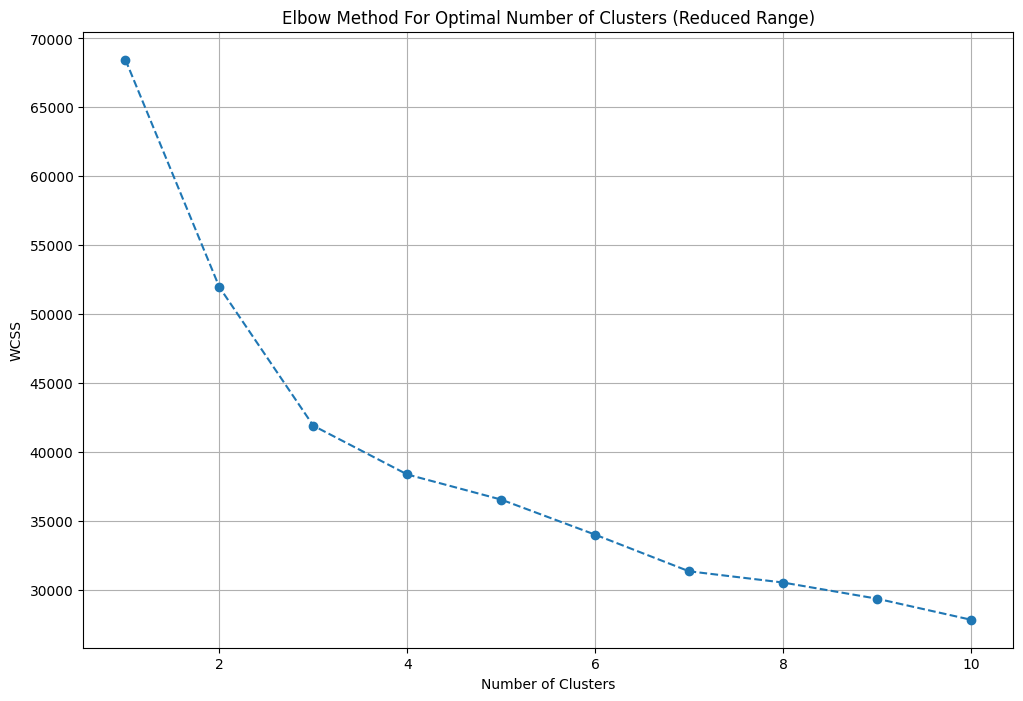

In [154]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [155]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [156]:
df = df.iloc[:,:-18]

In [157]:
df['furnishing_type'] = cluster_assignments

In [162]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
592,"['1 Fridge', '7 Fan', '1 Exhaust Fan', '1 Geyser', '1 Stove', '10 Light', '1 Curtains', '3 AC', '1 Modular Kitchen', '1 Chimney', '3 Wardrobe', '1 Microwave', '1 Washing Machine', 'No Bed', 'No Dining Table', 'No Sofa', 'No TV', 'No Water Purifier']",1
3719,"['2 Fan', '2 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0
2794,NaN,0
1920,"['1 Water Purifier', '8 Fan', '1 Fridge', '1 Exhaust Fan', '1 Dining Table', '6 Geyser', '1 Stove', '40 Light', '1 Chimney', '1 Modular Kitchen', '1 Curtains', '5 Wardrobe', '1 Sofa', '1 Microwave', '1 Washing Machine', 'No AC', 'No Bed', 'No TV']",1
1505,[],0


In [163]:
df[['society','features']].sample(5)

,society,features
2982,vipul tatvam villa,"['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Rain Water Harvesting']"
3594,vipul lavanya,"['Security / Fire Alarm', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
2760,unitech espace,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Fitness Centre / GYM', 'Club house / Community Center']"
2714,signature global park,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Water Storage', 'Park', 'Visitor Parking', 'Fitness Centre / GYM', 'Club house / Community Center']"
3305,experion windchants,"['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"


In [164]:
df['features'].isnull().sum()

635

In [165]:
app_df = pd.read_csv('appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [166]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [167]:
temp_df = df[df['features'].isnull()]

In [168]:
temp_df.shape

(635, 27)

In [169]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [170]:
df.loc[temp_df.index,'features'] = x.values

In [171]:
df['features'].isnull().sum()

481

In [172]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [173]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [174]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
452,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1817,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0
2692,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
553,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
334,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0


In [175]:
features_binary_df.shape

(3803, 130)

In [176]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

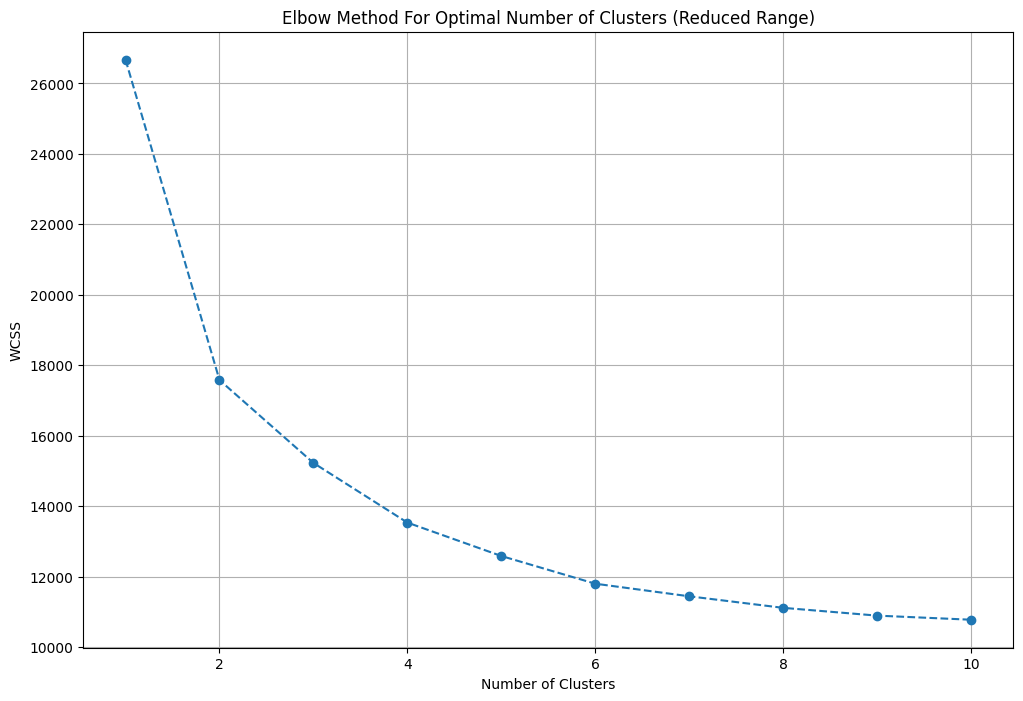

In [177]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [ ]:
#As it is suggected to divide no of cluster into two parts we don't use this approach

In [178]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [179]:
df['luxury_score'] = luxury_score

In [180]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,property_id,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,house,international city by sobha phase 2,sector 109,8.75,24306.0,3600.0,Plot area 400(334.45 sq.m.),5,5,3+,"pooja room,servant room,study room,store room",3.0,North-East,New Property,"['Dwarka Sector 21 Metro Station', 'Pacific D21 Mall', 'Dwarka Expressway', 'Euro International School', 'The NorthCap University', 'Aryan Hospital', 'Indira Gandhi Intl Airport', 'Gurgaon Railway Station']","['5 Wardrobe', '7 Fan', '1 Exhaust Fan', '5 Geyser', '1 Stove', '1 Microwave', '10 Light', '1 Modular Kitchen', '6 AC', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Centrally Air Conditioned', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",P69790258,NaN,NaN,NaN,1,1,1,1,0,2,"[Security / Fire Alarm, Feng Shui / Vaastu Compliant, Private Garden / Terrace, Centrally Air Conditioned, Water purifier, High Ceiling Height, Maintenance Staff, False Ceiling Lighting, Water Storage, Separate entry for servant room, No open drainage around, Visitor Parking, Swimming Pool, Park, Security Personnel, Natural Light, Internet/wi-fi connectivity, Airy Rooms, Spacious Interiors, Fitness Centre / GYM, Waste Disposal, Rain Water Harvesting, Club house / Community Center]",153
1,house,eldeco mansionz,sector 48,6.40,23704.0,2700.0,Plot area 365(305.19 sq.m.)Built Up area: 366 sq.yards (306.02 sq.m.),4,4,3,"servant room,store room",3.0,West,Moderately Old,"['Sri Radhe Krishna Temple', 'Icici bank ATM', 'Standard chartered ATM', 'Divine Look Clinic Centre', 'Skin Clinic', 'Wellness Eye Centre', 'Dr. Aruna Kalra', 'Best Urologist Atcomplete Family Clinic', 'Dr. Anuj Sharma', 'Dr. Naresh Pandita', 'Neelkanth Health Care', 'Vishesh Dental', 'Park Hospital Gurgaon', 'Bones Clinic - Orthopaedics', 'Ekta Hospital', 'Sai Heart and Trauma Center', 'Meher Clinic', 'Sai Dharamraj Hospital', 'Sanjeevani Hospital Gurgaon', 'Sona Devi Memorial Hospital and Trauma Centre', 'Gobind Hospital', 'Wembley estate club', 'Genius', 'Gardian Pharmacy', 'Apollo Pharmacy', 'Kore Tech Park', 'SPAZE BUSINESS PARK', 'India Oil', 'SRS Cinemas', 'SRS Cinemas', 'Icici bank', 'Hdfc bank', 'Hdfc bank', 'Indusind bank', 'Hdfc bank', 'Central bank of india', 'Union bank of india', 'State bank of india', ""Domino's Pizza"", ""Nirula's"", 'Nook', 'Starbucks', 'Haldiram', 'India', 'Kamla International', 'Delhi Public School Primary Section']","['4 Wardrobe', '10 Fan', '1 Exhaust Fan', '4 Geyser', '1 Stove', '10 Light', '7 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",M69124884,N

In [181]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [182]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_id,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
813,flats,shree vardhman flora,sector 90,0.75,5769.0,1300.0,Carpet area: 1300 (120.77 sq.m.),2,2,3,8.0,North-East,Undefined,M68785780,NaN,NaN,1300.0,0,0,0,0,0,0,60
193,flats,sidhartha ncr one phase,sector 95,0.60,4800.0,1250.0,Built Up area: 1250 (116.13 sq.m.),2,2,3,10.0,North-East,Undefined,X69692376,NaN,1250.0,NaN,0,0,0,0,0,0,0
1588,flats,experion the heartsong,sector 108,1.20,6825.0,1758.0,Super Built up area 1758(163.32 sq.m.)Built Up area: 1550 sq.ft. (144 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.),3,2,3+,11.0,North-East,Relatively New,A69625254,1758.0,1550.0,1400.0,0,1,0,1,0,2,174
2237,flats,signature global solera,sector 107,0.37,6751.0,548.0,Super Built up area 548(50.91 sq.m.),2,2,1,10.0,South,Relatively New,U57619116,548.0,NaN,NaN,0,0,0,0,0,0,73
1126,flats,mvn athens,sector 33,0.24,4210.0,570.0,Super Built up area 570(52.95 sq.m.),2,2,1,12.0,NaN,Relatively New,R70087278,570.0,NaN,NaN,0,0,0,0,0,0,38


In [183]:
df.shape

(3803, 24)

In [184]:
df.drop(columns='property_id',inplace=True)

In [185]:
df.shape

(3803, 23)

In [186]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)

In [187]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,international city by sobha phase 2,sector 109,8.75,24306.0,3600.0,Plot area 400(334.45 sq.m.),5,5,3+,3.0,North-East,New Property,NaN,NaN,NaN,1,1,1,1,0,2,153
1,house,eldeco mansionz,sector 48,6.40,23704.0,2700.0,Plot area 365(305.19 sq.m.)Built Up area: 366 sq.yards (306.02 sq.m.),4,4,3,3.0,West,Moderately Old,NaN,366.00,NaN,0,1,1,0,0,2,151
2,flats,bestech park view city,sector 49,2.90,12169.0,2383.0,Super Built up area 2383(221.39 sq.m.),4,4,3+,5.0,South-West,Moderately Old,2383.0,NaN,NaN,0,1,0,0,0,0,117
3,flats,denso haryana housing society,manesar,0.90,4308.0,2089.0,Carpet area: 2089 (194.07 sq.m.),3,3,3+,5.0,East,Moderately Old,NaN,NaN,2089.0,0,1,0,0,0,0,7
4,flats,experion windchants,sector 112,3.40,12134.0,2802.0,Super Built up area 2802(260.31 sq.m.)Built Up area: 2225.56 sq.ft. (206.76 sq.m.),3,3,2,14.0,North-East,Relatively New,2802.0,2225.56,NaN,0,0,0,0,0,2,159
